In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#csv 파일 읽기
df = pd.read_csv("Covid Data.csv")
df['died'] = df['DATE_DIED'] != '9999-99-99'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [11]:
# USER = 1차 진료 기관 여부 1 = YES 2= NO
#medical_unit	진료받은 의료 기관 코드	병원 종류나 지역
#sex	성별	1=남자, 2=여자
#patient_type	외래 vs 입원 여부	1=외래, 2=입원
#date_died	사망일	'9999-99-99'이면 아직 생존
#intubed	삽관 여부	1=Yes, 2=No, 97=알 수 없음
#pneumonia	폐렴 여부	1=Yes, 2=No
#age	나이	숫자
#pregnant	임신 여부 (여성만 해당)	1=Yes, 2=No
#diabetes	당뇨 여부	1=Yes, 2=No
#copd	만성폐쇄성폐질환 여부	1=Yes, 2=No
#asthma	천식 여부	1=Yes, 2=No
#inmsupr	면역억제 여부	1=Yes, 2=No
#hipertension	고혈압 여부	1=Yes, 2=No
#other_disease	기타 질환	1=Yes, 2=No
# cardiovascular	심혈관 질환	1=Yes, 2=No
#obesity	비만 여부	1=Yes, 2=No
#renal_chronic	만성 신장 질환	1=Yes, 2=No
#tobacco	흡연 여부	1=Yes, 2=No
#clasiffication_final	코로나 확진 여부	1=양성, 2=음성, 3=의심
#icu	중환자실 입실 여부	1=Yes, 2=No, 97=모름


In [12]:
# 전체 중 고혈압 환자
high_hpt=df[df['HIPERTENSION']==1]

#전체 중 고혈압 아닌 환자
no_hpt = df[df['HIPERTENSION']==2]

In [13]:
print(f"총 {len(high_hpt)}명 고혈압 환자 데이터")

총 162729명 고혈압 환자 데이터


In [20]:
hpt_count=round(len(high_hpt)/len(df)*100,3)
print(f"고혈압 환자 비율: {hpt_count}%")

고혈압 환자 비율: 15.519%


In [21]:
#고혈압 중 사망자
dead_high_hpt=df[(df['HIPERTENSION'] == 1) & (df['DATE_DIED'] != '9999-99-99')]
print(f"{len(dead_high_hpt)}명")

32061명


In [22]:
# 고혈압 없는 사람 중 사망자
dead_no_hpt=df[(df['HIPERTENSION'] == 2) & (df['DATE_DIED'] != '9999-99-99')]
print(f"{len(dead_no_hpt)}명")

44191명


In [23]:
death_rate_high = round(len(dead_high_hpt)/len(high_hpt)*100,3)
death_rate_no = round(len(dead_no_hpt)/len(no_hpt)*100,3)

In [24]:
print(f"고혈압 환자 사망률 : {death_rate_high}")
print(f"고혈압 없는 환자 사망률 : {death_rate_no}")

고혈압 환자 사망률 : 19.702
고혈압 없는 환자 사망률 : 5.006


코로나 확진자 분석

In [25]:
#기저 질환이 코로나 사망률에 끼치는 영향

In [26]:
# 코로나 확진자
cvd = df[df['CLASIFFICATION_FINAL'] ==1]

In [27]:
# 코로나 확진자 사망자
dead_cvd = cvd[cvd['DATE_DIED'] != '9999-99-99']

In [28]:
#기저 질환 리스트
disease_list = ['DIABETES','HIPERTENSION','OBESITY']
results = {}

In [29]:
for disease in disease_list :
    with_disease = cvd[cvd[disease]==1]
    without_disease = cvd[cvd[disease]==2]
    
    death_rate_with = round(with_disease['died'].mean()*100,3)
    death_rate_without = round(without_disease['died'].mean()*100,3)
    
    results[disease] = {
        'with': death_rate_with,
        'without': death_rate_without
    }

for disease, rates in results.items():
    print(f"{disease.capitalize()}:")
    print(f"  * With    : {rates['with']}%")
    print(f"  * Without : {rates['without']}%\n")


Diabetes:
  * With    : 30.885%
  * Without : 7.695%

Hipertension:
  * With    : 25.768%
  * Without : 7.942%

Obesity:
  * With    : 14.687%
  * Without : 10.142%



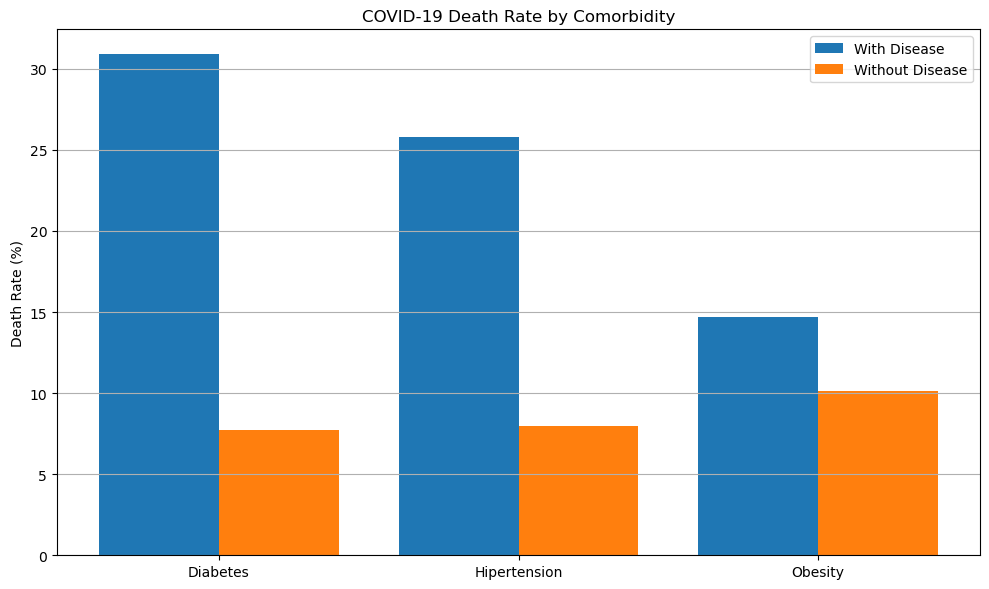

In [34]:
# x축에 표시할 질병 이름 리스트 (첫 글자만 대문자)
labels = [d.capitalize() for d in disease_list]

# 각각 질병에 대해 with/without 사망률 꺼내기
with_rates = [results[d]['with'] for d in disease_list]
without_rates = [results[d]['without'] for d in disease_list]

# x 위치 지정
x = range(len(disease_list))

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x, with_rates, width=0.4, label='With Disease', align='center')
plt.bar([i + 0.4 for i in x], without_rates, width=0.4, label='Without Disease', align='center')

# x축 눈금 위치 + 라벨
plt.xticks([i + 0.2 for i in x], labels)

# 그래프 제목과 라벨
plt.ylabel("Death Rate (%)")
plt.title("COVID-19 Death Rate by Comorbidity")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


로지스틱 회귀 모델

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 데이터 불러오기
df = pd.read_csv("Covid Data.csv")

# died 컬럼 생성
df['died'] = df['DATE_DIED'] != '9999-99-99'

# 코로나 확진자만 필터링
confirmed = df[df['CLASIFFICATION_FINAL'] == 1]

# 사용할 컬럼 선택
features = ['AGE', 'SEX', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'PNEUMONIA','INTUBED','CARDIOVASCULAR']
X = confirmed[features]
y = confirmed['died'].astype(int)  # True/False → 1/0으로 변환

# 결측치 제거 (있다면)
X = X.dropna()
y = y.loc[X.index]

# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score:\n {roc_auc_score(y_test, y_prob):.3f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1530
           1       0.63      0.51      0.56       191

    accuracy                           0.91      1721
   macro avg       0.78      0.74      0.76      1721
weighted avg       0.91      0.91      0.91      1721

Confusion Matrix:
 [[1473   57]
 [  94   97]]
ROC AUC Score:
 0.936


XGBoost 모델

In [59]:
#pip install XGBoost
from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# 평가
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob):.3f}\n")


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1530
           1       0.62      0.52      0.57       191

    accuracy                           0.91      1721
   macro avg       0.78      0.74      0.76      1721
weighted avg       0.91      0.91      0.91      1721

Confusion Matrix:
 [[1470   60]
 [  91  100]]

ROC AUC Score: 0.936



C:\Users\hyunsu\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:48:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SEX               0.444763
AGE               0.044829
HIPERTENSION      0.007502
OBESITY           0.004582
CARDIOVASCULAR    0.000654
DIABETES         -0.003201
INTUBED          -0.028080
PNEUMONIA        -1.363746
dtype: float64


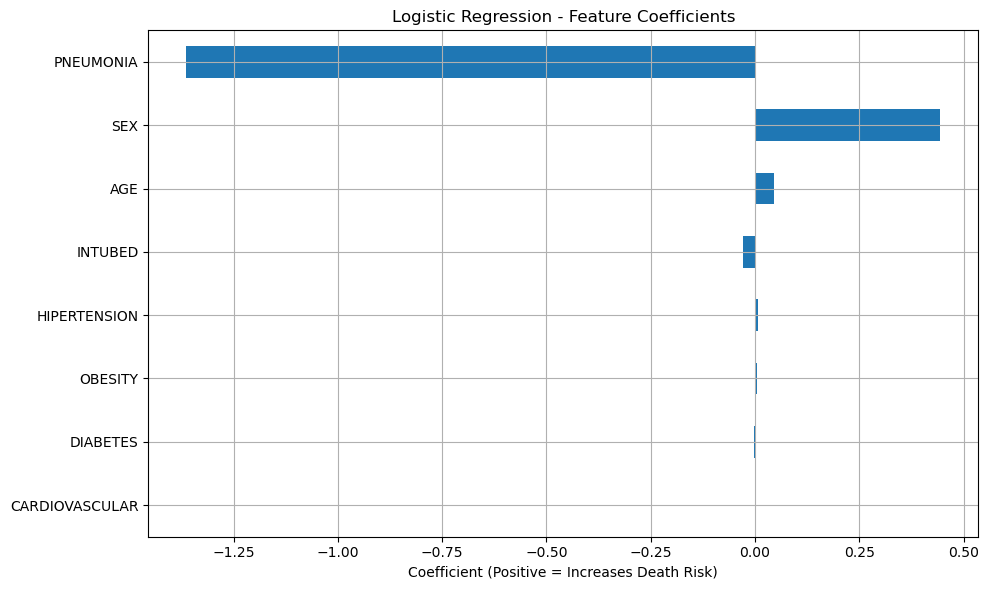

In [ ]:
import numpy as np
# 계수(coefficient) 확인
coefficients = pd.Series(model.coef_[0], index=X.columns)

# 영향력 큰 순서대로 정렬
coefficients_sorted = coefficients.sort_values(ascending=False)

print(coefficients_sorted)

# 계수 추출
coefficients = pd.Series(model.coef_[0], index=X.columns)

# 오즈비(odds ratio)도 같이 계산 (선택)
odds_ratios = np.exp(coefficients)

# 정렬 (절댓값 기준으로 영향력 큰 순서)
coefficients_sorted = coefficients.reindex(coefficients.abs().sort_values(ascending=True).index)

# 시각화
plt.figure(figsize=(10, 6))
coefficients_sorted.plot(kind='barh')
plt.title("Logistic Regression - Feature Coefficients")
plt.xlabel("Coefficient (Positive = Increases Death Risk)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 로지스틱 회귀 모델에서는 SEX 컬럼이 가장 영향력 높고 PNEUMONIA 컬럼이 영향력이 적음

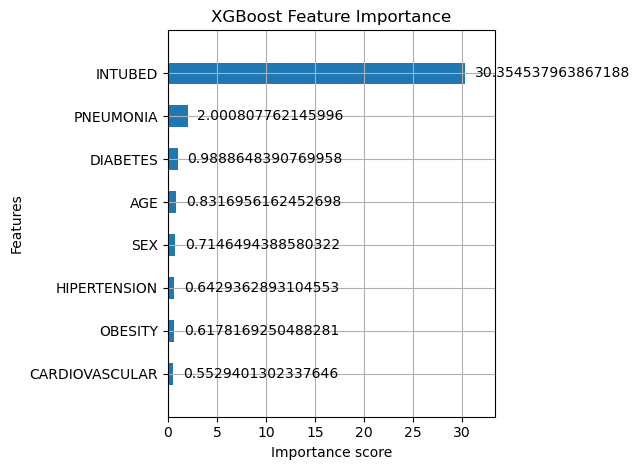

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 중요도 시각화
xgb.plot_importance(xgb_model, importance_type='gain', height=0.5)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

# XGBoost에서는 INTUBED 제일 영향력 높은 변수

Random Forest 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("  Random Forest")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_prob))

  Random Forest
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1530
           1       0.57      0.57      0.57       191

    accuracy                           0.90      1721
   macro avg       0.76      0.76      0.76      1721
weighted avg       0.90      0.90      0.90      1721

Confusion Matrix:
 [[1449   81]
 [  83  108]]
ROC AUC: 0.907861958046744


SVM 모델

In [68]:
# SVM은 특성 스케일링이 중요
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)
svm_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

print(" Support Vector Machine")
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("ROC AUC:", roc_auc_score(y_test, svm_prob))

 Support Vector Machine
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1530
           1       0.64      0.47      0.54       191

    accuracy                           0.91      1721
   macro avg       0.79      0.72      0.75      1721
weighted avg       0.90      0.91      0.91      1721

Confusion Matrix:
 [[1480   50]
 [ 101   90]]
ROC AUC: 0.8899428532320431


In [71]:
# 모델별 성능 기록
model_result = {
    "Logistic Regression": {
        "accuracy": 0.91,
        "roc_auc": 0.904,
        "f1_score": 0.56
    },
    "XGBoost": {
        "accuracy": 0.91,
        "roc_auc": 0.936,
        "f1_score": 0.57
    },
    "Random Forest": {
        "accuracy": 0.90,
        "roc_auc": 0.907,
        "f1_score": 0.57
    },
    "SVM": {
        "accuracy": 0.91,
        "roc_auc": 0.89,
        "f1_score": 0.54
    }
}

# 표로 변환해서 정렬
df_results = pd.DataFrame(model_result).T
df_results = df_results[['accuracy', 'roc_auc', 'f1_score']].round(3)
df_results.columns = ['Accuracy', 'ROC AUC', 'F1 Score']
df_results.index.name = 'Model'

# 출력
print("\n ML 모델 성능 비교")
print(df_results)



 ML 모델 성능 비교
                     Accuracy  ROC AUC  F1 Score
Model                                           
Logistic Regression      0.91    0.904      0.56
XGBoost                  0.91    0.936      0.57
Random Forest            0.90    0.907      0.57
SVM                      0.91    0.890      0.54


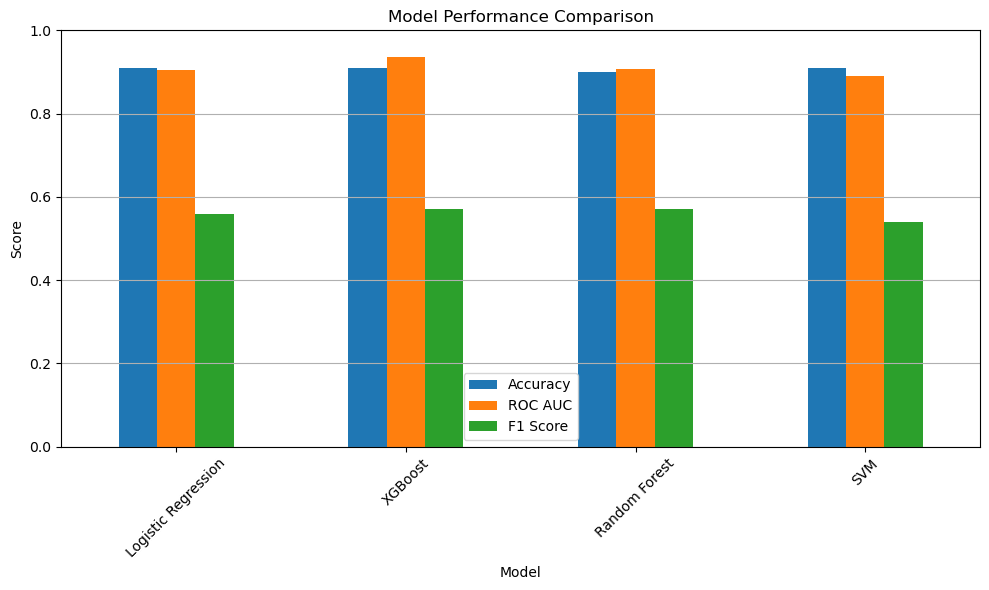

In [73]:
df_results.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


C:\Users\hyunsu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6485 - loss: 1.2060 - val_accuracy: 0.8924 - val_loss: 0.3726
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8878 - loss: 0.3658 - val_accuracy: 0.8910 - val_loss: 0.3047
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8837 - loss: 0.3056 - val_accuracy: 0.8932 - val_loss: 0.2663
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8849 - loss: 0.2827 - val_accuracy: 0.8961 - val_loss: 0.2520
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8923 - loss: 0.2568 - val_accuracy: 0.8968 - val_loss: 0.2503
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9008 - loss: 0.2409 - val_accuracy: 0.8874 - val_loss: 0.2638
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9010 - loss: 0.2392 - val_accuracy: 0.8983 - val_loss: 0.2500
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8903 - loss: 0.2482 - val_accuracy: 0.9012 - val_